<a href="https://colab.research.google.com/github/The1AndOnlyAlex/PyTorch-MNIST/blob/main/pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
from torch.optim import SGD
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = torch.tensor([[6,2],[5,2],[1,3],[7,6]]).float()
y = torch.tensor([1,5,2,5]).float()

In [3]:
x

tensor([[6., 2.],
        [5., 2.],
        [1., 3.],
        [7., 6.]])

In [4]:
y

tensor([1., 5., 2., 5.])

**Idea:**
1. First multiply each element in x by a 8 x 2 matrix (this is 16 parameters $a_i$)
2. Then multiply each element in x by a 1 x 8 matrix (this is 8 parameters $a_i$)

**IMPORTANT:** When the matrix is created, it is initially created with random values!

In [5]:
# Define a matrix (takes in 2d vector and returns an 8d vector)
M1 = nn.Linear(2,8,bias=False) # bias False means only doing Ax instead of Ax+b
M1

Linear(in_features=2, out_features=8, bias=False)

In [6]:
M1(x)

tensor([[ 3.7805,  0.0319, -1.0363, -3.0685, -2.5595,  2.6405, -1.0571,  1.8261],
        [ 3.2811,  0.2069, -0.8992, -2.5808, -2.2330,  2.3934, -1.0899,  1.3063],
        [ 1.6753,  1.4480, -0.4574, -0.7017, -1.2271,  1.9842, -1.8479, -1.4195],
        [ 5.8478,  2.0209, -1.6005, -3.8415, -4.0868,  5.2037, -3.5318, -0.2398]],
       grad_fn=<MmBackward0>)

In [7]:
# Now we can chain this with a second matrix M2
M2 = nn.Linear(8,1, bias=False)
M2

Linear(in_features=8, out_features=1, bias=False)

In [12]:
M2(M1(x))

tensor([[-1.4002],
        [-1.2498],
        [-0.8974],
        [-2.5466]], grad_fn=<MmBackward0>)

In [10]:
M2(M1(x)).shape

torch.Size([4, 1])

In [11]:
# We can squeeze out the extra 1 dimension since it's not needed
M2(M1(x)).squeeze()

tensor([-1.4002, -1.2498, -0.8974, -2.5466], grad_fn=<SqueezeBackward0>)

In [14]:
# compare to the "correct" values
y

tensor([1., 5., 2., 5.])

The weights of the matrices $M1$ and $M2$ constitute the weights $a$ of the network defined above. In order to optimize for these weights, we first construct our network $f$ as follows:

In [15]:
class MyNeuralNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.Matrix1 = nn.Linear(2,8,bias=False)
    self.Matrix2 = nn.Linear(8,1,bias=False)
  def forward(self,x):
    x = self.Matrix1(x)
    x = self.Matrix2(x)
    return x.squeeze()

In [16]:
f = MyNeuralNet()

In [17]:
f(x)

tensor([-1.0487, -0.9494, -0.7791, -2.0544], grad_fn=<SqueezeBackward0>)

In [18]:
# I can use the NeuralNet object to get the parameters:
for par in f.parameters():
  print(par)

Parameter containing:
tensor([[ 0.4504,  0.3314],
        [ 0.3711,  0.3263],
        [ 0.1344,  0.6593],
        [-0.3511,  0.1518],
        [ 0.5777,  0.1766],
        [ 0.0919, -0.5822],
        [-0.0885, -0.2991],
        [-0.4514, -0.3991]], requires_grad=True)
Parameter containing:
tensor([[-0.1940, -0.3147,  0.0507, -0.0823,  0.1479,  0.1296,  0.0287,  0.0568]],
       requires_grad=True)


In [19]:
yhat = f(x)
yhat

tensor([-1.0487, -0.9494, -0.7791, -2.0544], grad_fn=<SqueezeBackward0>)

In [20]:
y

tensor([1., 5., 2., 5.])

# **Adjusting $a$ so that $ŷ$ and $y$ are similar**

In [21]:
# Define a loss function
L = nn.MSELoss()
L(y,yhat)

tensor(24.2701, grad_fn=<MseLossBackward0>)

In [22]:
# Confirming it is doing the same as the regular mean-squared error:
torch.mean((y-yhat)**2)

tensor(24.2701, grad_fn=<MeanBackward0>)

Note that $L$ depends on $a$, since our predictions $ŷ$ depend on the parameters of the network $a$. In this sense, $L = L(a)$. **The main idea behind machine learning** is to compute

 $$ \frac{d L}{{d}a_i} $$

for each parameter $a_i$ of the network. Then we adjust each parameter as follows:

$$ a_i \rightarrow a_i - l\frac{d L}{{d}a_i} $$

where $ l $ is the learning rate.

Example: A loss function that only depends on one parameter:

In [23]:
# Keep adding/subtracting a_i
# Do this over and over again, as it approaches the loss minimum
# This is called gradient descent!
# Each pass of the full data set x is called an Epoch
# You can split the data set x into, say, 5 parts for example to reduce compute time
# One full pass is considered going across and calculating loss across all 5 parts

In [25]:
# The SGD (meaning stochastic gradient descent) takes in all model
# parameters a along with the learning rate l

opt = SGD(f.parameters(), lr=0.001)

Adjust the parameters over and over:

In [26]:
losses = []
for _ in range(50):
  opt.zero_grad() # flush previous epoch's gradient
  loss_value = L(f(x), y) # compute loss
  loss_value.backward() # compute gradient
  opt.step() # Perform iteration using gradient above
  losses.append(loss_value.item())

Plot $ L(a) $ as a function of number of iterations

<>:2: SyntaxWarning: invalid escape sequence '\h'
<>:2: SyntaxWarning: invalid escape sequence '\h'
/tmp/ipython-input-1394971893.py:2: SyntaxWarning: invalid escape sequence '\h'
  plt.ylabel('Loss $L(y, \hat{y};a)$')


Text(0.5, 0, 'Epochs')

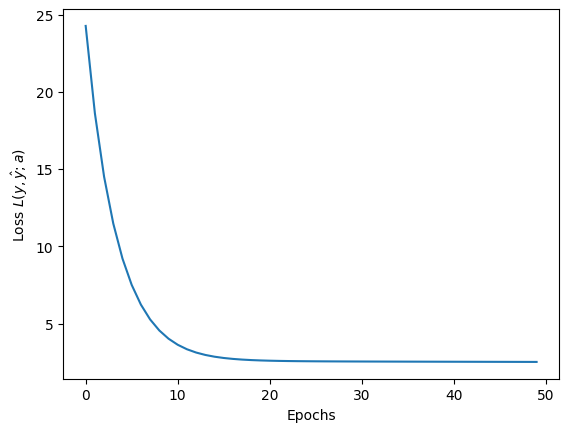

In [27]:
plt.plot(losses)
plt.ylabel('Loss $L(y, \hat{y};a)$')
plt.xlabel('Epochs')

This is as close as we can make the model $f$ predict $y$ from $x$:

In [28]:
f(x)

tensor([3.1992, 2.7810, 1.4535, 4.9978], grad_fn=<SqueezeBackward0>)

In [29]:
y

tensor([1., 5., 2., 5.])

And this is as close as we can get with a model using 2 matrices (2 layers)